In [372]:
# Import pandas modules
import pandas as pd
import numpy as np
import json
import os
import datetime as dt
import time as time
from time import mktime
import matplotlib.pyplot as plt  
import seaborn as sns
    

In [373]:
# Isolate data items
# Date Range A: Normal Operating Period 22nd Dec 2017 - 25th Jan 2018
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268
#Final Week Range A - ATL  

Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL']
Date_Range_A_Dates = ['20180122', '20180123', '20180124','20180125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_A_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"


for Airport in Airports:
    
    for Date in Date_Range_A_Dates:
        Date_Range_A_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_A_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
            
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]
            

Flight Counter: 1
Airline Flight#: DL295
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T11:07:00.000
Actual Departure: 2018-01-22T19:04:00.000
Flight Departure Delayed by (H:M:S): 7:57:00
Departure Time Delta (minutes): 477.0


Flight Counter: 2
Airline Flight#: DL1661
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:25:00.000
Actual Departure: 2018-01-22T13:54:00.000
Flight Departure Delayed by (H:M:S): 0:29:00
Departure Time Delta (minutes): 29.0


Flight Counter: 3
Airline Flight#: DL2297
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:40:00.000
Actual Departure: 2018-01-22T13:40:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 4
Airline Flight#: DL2472
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T13:40:00.000
Actual Departure: 2018-01-22T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 5
Airline Flight#: DL2046
Airport: 

Flight Counter: 56
Airline Flight#: DL2184
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:56:00.000
Actual Departure: 2018-01-22T14:53:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 57
Airline Flight#: DL2256
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:56:00.000
Actual Departure: 2018-01-22T14:50:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 58
Airline Flight#: DL1136
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:56:00.000
Actual Departure: 2018-01-22T14:51:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 59
Airline Flight#: DL1804
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:57:00.000
Actual Departure: 2018-01-22T14:51:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 60
Airline Flight#: 

Flight Counter: 110
Airline Flight#: DL1270
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:48:00.000
Actual Departure: 2018-01-22T15:41:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 111
Airline Flight#: DL1462
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:52:00.000
Actual Departure: 2018-01-22T15:45:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 112
Airline Flight#: DL1105
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:53:00.000
Actual Departure: 2018-01-22T15:52:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 113
Airline Flight#: DL1110
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:55:00.000
Actual Departure: 2018-01-22T15:53:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 114
Airline Flig

Flight Departure Delayed by (H:M:S): 0:31:00
Departure Time Delta (minutes): 31.0


Flight Counter: 162
Airline Flight#: DL29
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:55:00.000
Actual Departure: 2018-01-22T17:17:00.000
Flight Departure Delayed by (H:M:S): 0:22:00
Departure Time Delta (minutes): 22.0


Flight Counter: 163
Airline Flight#: DL887
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:56:00.000
Actual Departure: 2018-01-22T16:54:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 164
Airline Flight#: DL359
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:57:00.000
Actual Departure: 2018-01-22T16:52:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 165
Airline Flight#: DL109
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T16:57:00.000
Actual Departure: 2018-01-22T16:54:00.000
Flight Departed Early by (H:M:S

Flight Counter: 203
Airline Flight#: DL909
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:52:00.000
Actual Departure: 2018-01-22T17:51:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 204
Airline Flight#: DL1445
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:53:00.000
Actual Departure: 2018-01-22T18:13:00.000
Flight Departure Delayed by (H:M:S): 0:20:00
Departure Time Delta (minutes): 20.0


Flight Counter: 205
Airline Flight#: DL2067
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:53:00.000
Actual Departure: 2018-01-22T17:50:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 206
Airline Flight#: DL1236
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T17:54:00.000
Actual Departure: 2018-01-22T17:47:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 207
Airline Fl

Flight Counter: 238
Airline Flight#: DL1945
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T18:48:00.000
Actual Departure: 2018-01-22T18:45:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 239
Airline Flight#: DL355
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T18:52:00.000
Actual Departure: 2018-01-22T18:51:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 240
Airline Flight#: DL2150
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T18:55:00.000
Actual Departure: 2018-01-22T18:53:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 241
Airline Flight#: DL2502
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:00:00.000
Actual Departure: 2018-01-22T18:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 242
Airline Fligh

Flight Counter: 299
Airline Flight#: DL2426
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:55:00.000
Actual Departure: 2018-01-22T20:02:00.000
Flight Departure Delayed by (H:M:S): 0:07:00
Departure Time Delta (minutes): 7.0


Flight Counter: 300
Airline Flight#: DL1340
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:55:00.000
Actual Departure: 2018-01-22T20:01:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 301
Airline Flight#: DL2289
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:56:00.000
Actual Departure: 2018-01-22T20:01:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 302
Airline Flight#: DL1753
Airport: ATL
Date: 2018-01-22
Scheduled Departure: 2018-01-22T19:57:00.000
Actual Departure: 2018-01-22T21:46:00.000
Flight Departure Delayed by (H:M:S): 1:49:00
Departure Time Delta (minutes): 109.0


Flight Counter: 303
Ai

Flight Counter: 340
Airline Flight#: DL2449
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:11:00.000
Actual Departure: 2018-01-23T14:07:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 341
Airline Flight#: DL1178
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:12:00.000
Actual Departure: 2018-01-23T14:07:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 342
Airline Flight#: DL768
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:15:00.000
Actual Departure: 2018-01-23T14:14:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 343
Airline Flight#: DL1612
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T14:19:00.000
Actual Departure: 2018-01-23T14:19:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 344
Airline Flight#: DL1754
Airport: 

Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:05:00.000
Actual Departure: 2018-01-23T15:05:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 381
Airline Flight#: DL1666
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:05:00.000
Actual Departure: 2018-01-23T15:00:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 382
Airline Flight#: DL1158
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:06:00.000
Actual Departure: 2018-01-23T15:05:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 383
Airline Flight#: DL1341
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:06:00.000
Actual Departure: 2018-01-23T14:59:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 384
Airline Flight#: DL320
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T15:1

Flight Counter: 424
Airline Flight#: DL1176
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:13:00.000
Actual Departure: 2018-01-23T16:11:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 425
Airline Flight#: DL2319
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:15:00.000
Actual Departure: 2018-01-23T16:08:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 426
Airline Flight#: DL1626
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:20:00.000
Actual Departure: 2018-01-23T16:20:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 427
Airline Flight#: DL2337
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T16:20:00.000
Actual Departure: 2018-01-23T16:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 428
Airline Flight#: DL2483
Airport:

Departure Time Delta (minutes): 40.0


Flight Counter: 507
Airline Flight#: DL2291
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:56:00.000
Actual Departure: 2018-01-23T17:55:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 508
Airline Flight#: DL337
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:56:00.000
Actual Departure: 2018-01-23T19:17:00.000
Flight Departure Delayed by (H:M:S): 1:21:00
Departure Time Delta (minutes): 81.0


Flight Counter: 509
Airline Flight#: DL325
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:57:00.000
Actual Departure: 2018-01-23T18:03:00.000
Flight Departure Delayed by (H:M:S): 0:06:00
Departure Time Delta (minutes): 6.0


Flight Counter: 510
Airline Flight#: DL313
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:58:00.000
Actual Departure: 2018-01-23T17:52:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes)

Flight Counter: 552
Airline Flight#: DL31
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:18:00.000
Actual Departure: 2018-01-23T19:15:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 553
Airline Flight#: DL2408
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:18:00.000
Actual Departure: 2018-01-23T19:29:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 554
Airline Flight#: DL2366
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:18:00.000
Actual Departure: 2018-01-23T19:16:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 555
Airline Flight#: DL2313
Airport: ATL
Date: 2018-01-23
Scheduled Departure: 2018-01-23T19:19:00.000
Actual Departure: 2018-01-23T19:12:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 556
Airline Fli

Flight Counter: 600
Airline Flight#: DL1951
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:47:00.000
Actual Departure: 2018-01-24T13:58:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 601
Airline Flight#: DL1755
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:47:00.000
Actual Departure: 2018-01-24T13:57:00.000
Flight Departure Delayed by (H:M:S): 0:10:00
Departure Time Delta (minutes): 10.0


Flight Counter: 602
Airline Flight#: DL2134
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:48:00.000
Actual Departure: 2018-01-24T13:47:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 603
Airline Flight#: DL2329
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T13:50:00.000
Actual Departure: 2018-01-24T13:51:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 604
Airl

Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 649
Airline Flight#: DL2256
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T14:56:00.000
Actual Departure: 2018-01-24T14:53:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 650
Airline Flight#: DL1136
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T14:56:00.000
Actual Departure: 2018-01-24T15:38:00.000
Flight Departure Delayed by (H:M:S): 0:42:00
Departure Time Delta (minutes): 42.0


Flight Counter: 651
Airline Flight#: DL1804
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T14:57:00.000
Actual Departure: 2018-01-24T14:53:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 652
Airline Flight#: DL1083
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:00:00.000
Actual Departure: 2018-01-24T14:58:00.000
Flight Departed Early by (H:M

Flight Counter: 690
Airline Flight#: DL82
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:29:00.000
Actual Departure: 2018-01-24T15:22:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 691
Airline Flight#: DL1307
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:30:00.000
Actual Departure: 2018-01-24T15:26:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 692
Airline Flight#: DL2111
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:30:00.000
Actual Departure: 2018-01-24T15:30:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 693
Airline Flight#: DL2568
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T15:30:00.000
Actual Departure: 2018-01-24T15:51:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 694
Airline Flight#: DL1792
Airport

Flight Counter: 742
Airline Flight#: DL1705
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:44:00.000
Actual Departure: 2018-01-24T16:41:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 743
Airline Flight#: DL1623
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:45:00.000
Actual Departure: 2018-01-24T16:39:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 744
Airline Flight#: DL1800
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:45:00.000
Actual Departure: 2018-01-24T16:43:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 745
Airline Flight#: DL1777
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T16:47:00.000
Actual Departure: 2018-01-24T16:44:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 746
Airline Flig

Flight Counter: 795
Airline Flight#: DL2534
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:55:00.000
Actual Departure: 2018-01-24T17:50:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 796
Airline Flight#: DL1789
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:55:00.000
Actual Departure: 2018-01-24T17:54:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 797
Airline Flight#: DL337
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:56:00.000
Actual Departure: 2018-01-24T17:55:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 798
Airline Flight#: DL2291
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T17:56:00.000
Actual Departure: 2018-01-24T17:54:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 799
Airline Fligh

Departure Time Delta (minutes): -6.0


Flight Counter: 840
Airline Flight#: DL1285
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:10:00.000
Actual Departure: 2018-01-24T19:06:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 841
Airline Flight#: DL1454
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:10:00.000
Actual Departure: 2018-01-24T20:20:00.000
Flight Departure Delayed by (H:M:S): 1:10:00
Departure Time Delta (minutes): 70.0


Flight Counter: 842
Airline Flight#: DL2052
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:11:00.000
Actual Departure: 2018-01-24T19:06:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 843
Airline Flight#: DL1124
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:11:00.000
Actual Departure: 2018-01-24T19:06:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes

Flight Counter: 879
Airline Flight#: DL1245
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:51:00.000
Actual Departure: 2018-01-24T19:49:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 880
Airline Flight#: DL1289
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:51:00.000
Actual Departure: 2018-01-24T19:52:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 881
Airline Flight#: DL2827
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:52:00.000
Actual Departure: 2018-01-24T19:54:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 882
Airline Flight#: DL1515
Airport: ATL
Date: 2018-01-24
Scheduled Departure: 2018-01-24T19:54:00.000
Actual Departure: 2018-01-24T19:50:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 883
Airline 

Flight Counter: 930
Airline Flight#: DL1453
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:21:00.000
Actual Departure: 2018-01-25T14:21:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 931
Airline Flight#: DL1116
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:21:00.000
Actual Departure: 2018-01-25T14:17:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 932
Airline Flight#: DL780
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:24:00.000
Actual Departure: 2018-01-25T14:24:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 933
Airline Flight#: DL1695
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T14:25:00.000
Actual Departure: 2018-01-25T14:21:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 934
Airline Flight#: DL2416
Airport: ATL
Date: 2018-01-25

Flight Counter: 979
Airline Flight#: DL2469
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:15:00.000
Actual Departure: 2018-01-25T15:12:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 980
Airline Flight#: DL2365
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:16:00.000
Actual Departure: 2018-01-25T15:13:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 981
Airline Flight#: DL885
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:17:00.000
Actual Departure: 2018-01-25T15:17:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 982
Airline Flight#: DL1983
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T15:17:00.000
Actual Departure: 2018-01-25T15:16:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 983
Airline Flight#: DL1922
Airport: 

Flight Counter: 1027
Airline Flight#: DL1646
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:26:00.000
Actual Departure: 2018-01-25T16:25:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1028
Airline Flight#: DL2428
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:27:00.000
Actual Departure: 2018-01-25T16:26:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1029
Airline Flight#: DL1778
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:28:00.000
Actual Departure: 2018-01-25T16:26:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1030
Airline Flight#: DL1364
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T16:30:00.000
Actual Departure: 2018-01-25T16:28:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1031
Airline

Flight Counter: 1079
Airline Flight#: DL2863
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:38:00.000
Actual Departure: 2018-01-25T17:42:00.000
Flight Departure Delayed by (H:M:S): 0:04:00
Departure Time Delta (minutes): 4.0


Flight Counter: 1080
Airline Flight#: DL672
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:38:00.000
Actual Departure: 2018-01-25T17:34:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 1081
Airline Flight#: DL2909
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:38:00.000
Actual Departure: 2018-01-25T17:36:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1082
Airline Flight#: DL15
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T17:40:00.000
Actual Departure: 2018-01-25T17:45:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 1083
Airlin

Flight Counter: 1121
Airline Flight#: DL2394
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:29:00.000
Actual Departure: 2018-01-25T18:29:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1122
Airline Flight#: DL1945
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:29:00.000
Actual Departure: 2018-01-25T18:26:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1123
Airline Flight#: DL1933
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:29:00.000
Actual Departure: 2018-01-25T18:30:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 1124
Airline Flight#: DL2652
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:30:00.000
Actual Departure: 2018-01-25T18:46:00.000
Flight Departure Delayed by (H:M:S): 0:16:00
Departure Time Delta (minutes): 16.0


Flight Counter: 1125
Airline Flight#: DL120

Flight Counter: 1172
Airline Flight#: DL2348
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:31:00.000
Actual Departure: 2018-01-25T19:31:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1173
Airline Flight#: DL1356
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:33:00.000
Actual Departure: 2018-01-25T19:28:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 1174
Airline Flight#: DL1979
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:34:00.000
Actual Departure: 2018-01-25T19:36:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1175
Airline Flight#: DL504
Airport: ATL
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:38:00.000
Actual Departure: 2018-01-25T19:36:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1176
Airline Flight#: DL1576
Ai

In [374]:
# Summarize Date Range A


    
print(f"\nDeparture Summary for Date Range A\n")



Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays], "Airport": [myFlightDepAirport]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()

#List = List.append(Sum_Early)

ListATLAF = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListATLAF))




Departure Summary for Date Range A

Total Departures Early: 818
Total Departures On Time: 99
Total Departures Delayed: 289
Total Departures: 1206

3


In [375]:
# Describe Date Range A
Date_Range_A_df.describe()



,Delay
count,1206.000000
mean,2.378109
std,28.894652
min,-12.000000
25%,-4.000000
50%,-2.000000
75%,0.000000
max,759.000000


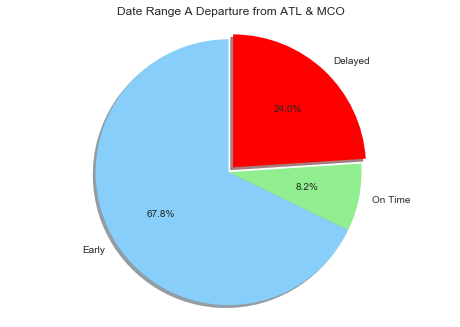

In [376]:
c


In [377]:
#Final Week Range A - MCO 

Date_Range_A_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['MCO']
Date_Range_A_Dates = ['20180122', '20180123', '20180124','20180125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_A_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"


for Airport in Airports:
    
    for Date in Date_Range_A_Dates:
        Date_Range_A_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_A_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
            
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_A_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]
            

Flight Counter: 1
Airline Flight#: DL1424
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:06:00.000
Actual Departure: 2018-01-22T14:03:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 2
Airline Flight#: DL1491
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:20:00.000
Actual Departure: 2018-01-22T14:16:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 3
Airline Flight#: DL1787
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T14:22:00.000
No Gate Depature Delay Data
Delay (Minutes): 0
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 4
Airline Flight#: DL72
Airport: MCO
Date: 2018-01-22
Scheduled Departure: 2018-01-22T15:20:00.000
Actual Departure: 2018-01-22T15:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 5
Airline Flight#: DL1839
Airport: MCO
Da

Flight Counter: 38
Airline Flight#: DL2109
Airport: MCO
Date: 2018-01-23
Scheduled Departure: 2018-01-23T17:30:00.000
Actual Departure: 2018-01-23T17:25:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 39
Airline Flight#: DL1110
Airport: MCO
Date: 2018-01-23
Scheduled Departure: 2018-01-23T18:30:00.000
Actual Departure: 2018-01-23T18:14:00.000
Flight Departed Early by (H:M:S): 0:16:00
Departure Time Delta (minutes): -16.0


Flight Counter: 40
Airline Flight#: DL2880
Airport: MCO
Date: 2018-01-23
Scheduled Departure: 2018-01-23T18:40:00.000
Actual Departure: 2018-01-23T18:26:00.000
Flight Departed Early by (H:M:S): 0:14:00
Departure Time Delta (minutes): -14.0


Flight Counter: 41
Airline Flight#: DL1061
Airport: MCO
Date: 2018-01-23
Scheduled Departure: 2018-01-23T18:51:00.000
Actual Departure: 2018-01-23T18:50:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 42
Airline Flight#

Flight Counter: 83
Airline Flight#: DL2880
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:40:00.000
Actual Departure: 2018-01-25T18:33:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 84
Airline Flight#: DL1061
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:51:00.000
Actual Departure: 2018-01-25T19:04:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 85
Airline Flight#: DL2703
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T18:55:00.000
Actual Departure: 2018-01-25T18:49:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 86
Airline Flight#: DL1261
Airport: MCO
Date: 2018-01-25
Scheduled Departure: 2018-01-25T19:04:00.000
Actual Departure: 2018-01-25T18:59:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 87
Airline Flight

In [378]:
# Summarize Date Range A


    
print(f"\nDeparture Summary for Date Range A\n")



Sum_Early = (Date_Range_A_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_A_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_A_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_A_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_A_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays], "Airport": [myFlightDepAirport]}
Date_Range_A_Summary_table = pd.DataFrame(Date_Range_A_Summary_data)

Date_Range_A_Summary_table.head()

#List = List.append(Sum_Early)

ListMCOAF = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListMCOAF))


Departure Summary for Date Range A

Total Departures Early: 56
Total Departures On Time: 8
Total Departures Delayed: 25
Total Departures: 89

3


In [379]:
# Compare total number of flights, average flights per day

# Plot average delay by hour in a random day during Date Range A
# Plot average delay by hour in a random day during Date Range B

In [380]:
#Range B Final Week Atlanta 

# Isolate data items
# Date Range B: Shutdown Operating Period 22nd Dec 2018 - 25th Jan 2019
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['ATL']
Date_Range_B_Dates = ['20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]

Flight Counter: 1
Airline Flight#: DL1675
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T12:59:00.000
Actual Departure: 2019-01-22T20:39:00.000
Flight Departure Delayed by (H:M:S): 7:40:00
Departure Time Delta (minutes): 460.0


Flight Counter: 2
Airline Flight#: DL9936
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:00:00.000
Actual Departure: 2019-01-22T17:52:00.000
Flight Departure Delayed by (H:M:S): 4:52:00
Departure Time Delta (minutes): 292.0


Flight Counter: 3
Airline Flight#: DL1311
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:22:00.000
Actual Departure: 2019-01-22T14:10:00.000
Flight Departure Delayed by (H:M:S): 0:48:00
Departure Time Delta (minutes): 48.0


Flight Counter: 4
Airline Flight#: DL1992
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:41:00.000
Actual Departure: 2019-01-22T14:46:00.000
Flight Departure Delayed by (H:M:S): 1:05:00
Departure Time Delta (minutes): 65.0


Flight Counter: 5
Airline 

Flight Counter: 53
Airline Flight#: DL2653
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:56:00.000
Actual Departure: 2019-01-22T14:51:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 54
Airline Flight#: DL2016
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:58:00.000
Actual Departure: 2019-01-22T14:53:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 55
Airline Flight#: DL1897
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:58:00.000
Actual Departure: 2019-01-22T14:57:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 56
Airline Flight#: DL539
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:59:00.000
Actual Departure: 2019-01-22T15:02:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (minutes): 3.0


Flight Counter: 57
Airline Flight#:

Flight Counter: 93
Airline Flight#: DL2139
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:25:00.000
Actual Departure: 2019-01-22T15:23:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 94
Airline Flight#: DL1181
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:29:00.000
Actual Departure: 2019-01-22T16:24:00.000
Flight Departure Delayed by (H:M:S): 0:55:00
Departure Time Delta (minutes): 55.0


Flight Counter: 95
Airline Flight#: DL2223
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:30:00.000
Actual Departure: 2019-01-22T15:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 96
Airline Flight#: DL668
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T15:30:00.000
Actual Departure: 2019-01-22T15:27:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 97
Airline Flight#

Scheduled Departure: 2019-01-22T16:38:00.000
Actual Departure: 2019-01-22T16:32:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 149
Airline Flight#: DL1755
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:40:00.000
Actual Departure: 2019-01-22T16:37:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 150
Airline Flight#: DL348
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:44:00.000
Actual Departure: 2019-01-22T17:36:00.000
Flight Departure Delayed by (H:M:S): 0:52:00
Departure Time Delta (minutes): 52.0


Flight Counter: 151
Airline Flight#: DL2104
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T16:46:00.000
Actual Departure: 2019-01-22T16:44:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 152
Airline Flight#: DL2170
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-2

Flight Counter: 193
Airline Flight#: DL2795
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:52:00.000
Actual Departure: 2019-01-22T17:54:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 194
Airline Flight#: DL1153
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:55:00.000
Actual Departure: 2019-01-22T17:55:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 195
Airline Flight#: DL195
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:55:00.000
Actual Departure: 2019-01-22T18:23:00.000
Flight Departure Delayed by (H:M:S): 0:28:00
Departure Time Delta (minutes): 28.0


Flight Counter: 196
Airline Flight#: DL325
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T17:56:00.000
Actual Departure: 2019-01-22T18:14:00.000
Flight Departure Delayed by (H:M:S): 0:18:00
Departure Time Delta (minutes): 18.0


Flight Counter: 197
Airline Flight#: DL673
Air

Flight Counter: 229
Airline Flight#: DL2326
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:44:00.000
Actual Departure: 2019-01-22T19:38:00.000
Flight Departure Delayed by (H:M:S): 0:54:00
Departure Time Delta (minutes): 54.0


Flight Counter: 230
Airline Flight#: DL1678
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:45:00.000
Actual Departure: 2019-01-22T19:01:00.000
Flight Departure Delayed by (H:M:S): 0:16:00
Departure Time Delta (minutes): 16.0


Flight Counter: 231
Airline Flight#: DL1497
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:46:00.000
Actual Departure: 2019-01-22T18:42:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 232
Airline Flight#: DL2008
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T18:48:00.000
Actual Departure: 2019-01-22T18:42:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 233
Airlin

Flight Counter: 276
Airline Flight#: DL2611
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:51:00.000
Actual Departure: 2019-01-22T19:50:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 277
Airline Flight#: DL1990
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:52:00.000
Actual Departure: 2019-01-22T19:50:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 278
Airline Flight#: DL2158
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:52:00.000
Actual Departure: 2019-01-22T19:51:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 279
Airline Flight#: DL2228
Airport: ATL
Date: 2019-01-22
Scheduled Departure: 2019-01-22T19:52:00.000
Actual Departure: 2019-01-22T19:49:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 280
Airline Flig


Flight Counter: 315
Airline Flight#: DL2887
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:08:00.000
Actual Departure: 2019-01-23T14:08:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 316
Airline Flight#: DL1567
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:09:00.000
Actual Departure: 2019-01-23T14:06:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 317
Airline Flight#: DL1681
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:10:00.000
Actual Departure: 2019-01-23T16:09:00.000
Flight Departure Delayed by (H:M:S): 1:59:00
Departure Time Delta (minutes): 119.0


Flight Counter: 318
Airline Flight#: DL2026
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T14:10:00.000
Actual Departure: 2019-01-23T14:05:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 319
Airline Flight#: DL1673
Air

Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:10:00.000
Actual Departure: 2019-01-23T15:15:00.000
Flight Departure Delayed by (H:M:S): 0:05:00
Departure Time Delta (minutes): 5.0


Flight Counter: 371
Airline Flight#: DL2242
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:10:00.000
Actual Departure: 2019-01-23T15:07:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 372
Airline Flight#: DL1797
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:11:00.000
Actual Departure: 2019-01-23T15:07:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 373
Airline Flight#: DL2048
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T15:11:00.000
Actual Departure: 2019-01-23T15:26:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 374
Airline Flight#: DL880
Airport: ATL
Date: 2019-01-23
Scheduled D

Flight Counter: 434
Airline Flight#: DL2162
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:35:00.000
Actual Departure: 2019-01-23T16:49:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 435
Airline Flight#: DL2804
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:35:00.000
Actual Departure: 2019-01-23T16:37:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 436
Airline Flight#: DL1314
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:35:00.000
Actual Departure: 2019-01-23T16:32:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 437
Airline Flight#: DL2212
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T16:36:00.000
Actual Departure: 2019-01-23T16:59:00.000
Flight Departure Delayed by (H:M:S): 0:23:00
Departure Time Delta (minutes): 23.0


Flight Counter: 438
Airl

Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:48:00.000
Actual Departure: 2019-01-23T18:31:00.000
Flight Departure Delayed by (H:M:S): 0:43:00
Departure Time Delta (minutes): 43.0


Flight Counter: 482
Airline Flight#: DL14
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:50:00.000
Actual Departure: 2019-01-23T17:50:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 483
Airline Flight#: DL393
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:50:00.000
Actual Departure: 2019-01-23T17:44:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 484
Airline Flight#: DL795
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:50:00.000
Actual Departure: 2019-01-23T17:48:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 485
Airline Flight#: DL151
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T17:51

Departure Time Delta (minutes): 656.0


Flight Counter: 537
Airline Flight#: DL1293
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:03:00.000
Actual Departure: 2019-01-23T19:02:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 538
Airline Flight#: DL2235
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:08:00.000
Actual Departure: 2019-01-23T19:05:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 539
Airline Flight#: DL1653
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:09:00.000
Actual Departure: 2019-01-23T19:06:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 540
Airline Flight#: DL792
Airport: ATL
Date: 2019-01-23
Scheduled Departure: 2019-01-23T19:09:00.000
Actual Departure: 2019-01-23T19:09:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counte

Flight Counter: 584
Airline Flight#: DL2914
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T11:30:00.000
Actual Departure: 2019-01-24T14:28:00.000
Flight Departure Delayed by (H:M:S): 2:58:00
Departure Time Delta (minutes): 178.0


Flight Counter: 585
Airline Flight#: DL2486
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T12:05:00.000
Actual Departure: 2019-01-24T14:35:00.000
Flight Departure Delayed by (H:M:S): 2:30:00
Departure Time Delta (minutes): 150.0


Flight Counter: 586
Airline Flight#: DL425
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T12:10:00.000
Actual Departure: 2019-01-24T13:44:00.000
Flight Departure Delayed by (H:M:S): 1:34:00
Departure Time Delta (minutes): 94.0


Flight Counter: 587
Airline Flight#: DL1219
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T12:27:00.000
Actual Departure: 2019-01-24T14:32:00.000
Flight Departure Delayed by (H:M:S): 2:05:00
Departure Time Delta (minutes): 125.0


Flight Counter: 58

Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 648
Airline Flight#: DL1638
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:55:00.000
Actual Departure: 2019-01-24T14:55:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 649
Airline Flight#: DL1804
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:55:00.000
Actual Departure: 2019-01-24T14:54:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 650
Airline Flight#: DL914
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:55:00.000
Actual Departure: 2019-01-24T15:09:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 651
Airline Flight#: DL2653
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:56:00.000
Actual Departure: 2019-01-24T14:59:00.000
Flight Departure Delayed by (H:M:S): 0:03:00
Departure Time Delta (min

Flight Counter: 703
Airline Flight#: DL2094
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:46:00.000
Actual Departure: 2019-01-24T15:46:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 704
Airline Flight#: DL2314
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:48:00.000
Actual Departure: 2019-01-24T16:11:00.000
Flight Departure Delayed by (H:M:S): 0:23:00
Departure Time Delta (minutes): 23.0


Flight Counter: 705
Airline Flight#: DL1074
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:49:00.000
Actual Departure: 2019-01-24T16:02:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 706
Airline Flight#: DL1481
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:50:00.000
Actual Departure: 2019-01-24T16:04:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 707
Airline Flight#: DL788


Scheduled Departure: 2019-01-24T16:58:00.000
Actual Departure: 2019-01-24T16:59:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 759
Airline Flight#: DL2972
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:59:00.000
Actual Departure: 2019-01-24T17:07:00.000
Flight Departure Delayed by (H:M:S): 0:08:00
Departure Time Delta (minutes): 8.0


Flight Counter: 760
Airline Flight#: DL1069
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T16:59:00.000
Actual Departure: 2019-01-24T16:57:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 761
Airline Flight#: DL383
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T17:01:00.000
Actual Departure: 2019-01-24T16:59:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 762
Airline Flight#: DL1997
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-

Flight Counter: 807
Airline Flight#: DL981
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:02:00.000
Actual Departure: 2019-01-24T19:15:00.000
Flight Departure Delayed by (H:M:S): 1:13:00
Departure Time Delta (minutes): 73.0


Flight Counter: 808
Airline Flight#: DL2366
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:03:00.000
Actual Departure: 2019-01-24T17:59:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 809
Airline Flight#: DL1739
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:05:00.000
Actual Departure: 2019-01-24T18:30:00.000
Flight Departure Delayed by (H:M:S): 0:25:00
Departure Time Delta (minutes): 25.0


Flight Counter: 810
Airline Flight#: DL2970
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:05:00.000
Actual Departure: 2019-01-24T18:56:00.000
Flight Departure Delayed by (H:M:S): 0:51:00
Departure Time Delta (minutes): 51.0


Flight Counter: 811
Airl

Date: 2019-01-24
Scheduled Departure: 2019-01-24T18:58:00.000
Actual Departure: 2019-01-24T18:57:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 842
Airline Flight#: DL1524
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:00:00.000
Actual Departure: 2019-01-24T18:58:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 843
Airline Flight#: DL2265
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:00:00.000
Actual Departure: 2019-01-24T18:54:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 844
Airline Flight#: DL1435
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:01:00.000
Actual Departure: 2019-01-24T19:23:00.000
Flight Departure Delayed by (H:M:S): 0:22:00
Departure Time Delta (minutes): 22.0


Flight Counter: 845
Airline Flight#: DL2290
Airport: ATL
Date: 2019-01-24
Scheduled De

Flight Counter: 885
Airline Flight#: DL2158
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:52:00.000
Actual Departure: 2019-01-24T19:51:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 886
Airline Flight#: DL1990
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:52:00.000
Actual Departure: 2019-01-24T20:30:00.000
Flight Departure Delayed by (H:M:S): 0:38:00
Departure Time Delta (minutes): 38.0


Flight Counter: 887
Airline Flight#: DL2228
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:52:00.000
Actual Departure: 2019-01-24T20:07:00.000
Flight Departure Delayed by (H:M:S): 0:15:00
Departure Time Delta (minutes): 15.0


Flight Counter: 888
Airline Flight#: DL2140
Airport: ATL
Date: 2019-01-24
Scheduled Departure: 2019-01-24T19:53:00.000
Actual Departure: 2019-01-24T20:36:00.000
Flight Departure Delayed by (H:M:S): 0:43:00
Departure Time Delta (minutes): 43.0


Flight Counter: 889
Air

Flight Counter: 931
Airline Flight#: DL1766
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:15:00.000
Actual Departure: 2019-01-25T14:12:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 932
Airline Flight#: DL960
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:17:00.000
Actual Departure: 2019-01-25T14:13:00.000
Flight Departed Early by (H:M:S): 0:04:00
Departure Time Delta (minutes): -4.0


Flight Counter: 933
Airline Flight#: DL2313
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:17:00.000
Actual Departure: 2019-01-25T14:15:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 934
Airline Flight#: DL1312
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T14:21:00.000
Actual Departure: 2019-01-25T14:18:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 935
Airline Fligh

Flight Counter: 980
Airline Flight#: DL2801
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:10:00.000
Actual Departure: 2019-01-25T15:07:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 981
Airline Flight#: DL1925
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:10:00.000
Actual Departure: 2019-01-25T15:09:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 982
Airline Flight#: DL2048
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:11:00.000
Actual Departure: 2019-01-25T15:12:00.000
Flight Departure Delayed by (H:M:S): 0:01:00
Departure Time Delta (minutes): 1.0


Flight Counter: 983
Airline Flight#: DL1797
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T15:11:00.000
Actual Departure: 2019-01-25T15:08:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 984
Airline Fl

Flight Counter: 1025
Airline Flight#: DL2055
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:20:00.000
Actual Departure: 2019-01-25T16:17:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1026
Airline Flight#: DL1412
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:21:00.000
Actual Departure: 2019-01-25T16:18:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1027
Airline Flight#: DL480
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:21:00.000
Actual Departure: 2019-01-25T16:20:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1028
Airline Flight#: DL970
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T16:22:00.000
Actual Departure: 2019-01-25T16:21:00.000
Flight Departed Early by (H:M:S): 0:01:00
Departure Time Delta (minutes): -1.0


Flight Counter: 1029
Airline F

Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:22:00.000
Actual Departure: 2019-01-25T18:19:00.000
Flight Departure Delayed by (H:M:S): 0:57:00
Departure Time Delta (minutes): 57.0


Flight Counter: 1076
Airline Flight#: DL1451
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:23:00.000
Actual Departure: 2019-01-25T17:23:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 1077
Airline Flight#: DL296
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:25:00.000
Actual Departure: 2019-01-25T17:36:00.000
Flight Departure Delayed by (H:M:S): 0:11:00
Departure Time Delta (minutes): 11.0


Flight Counter: 1078
Airline Flight#: DL946
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T17:29:00.000
Actual Departure: 2019-01-25T18:01:00.000
Flight Departure Delayed by (H:M:S): 0:32:00
Departure Time Delta (minutes): 32.0


Flight Counter: 1079
Airline Flight#: DL2392
Airport: ATL
Date: 2019-01-25
Scheduled D

Flight Counter: 1115
Airline Flight#: DL981
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:02:00.000
Actual Departure: 2019-01-25T18:16:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 1116
Airline Flight#: DL2366
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:03:00.000
Actual Departure: 2019-01-25T18:00:00.000
Flight Departed Early by (H:M:S): 0:03:00
Departure Time Delta (minutes): -3.0


Flight Counter: 1117
Airline Flight#: DL108
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:03:00.000
Actual Departure: 2019-01-25T18:05:00.000
Flight Departure Delayed by (H:M:S): 0:02:00
Departure Time Delta (minutes): 2.0


Flight Counter: 1118
Airline Flight#: DL2970
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T18:05:00.000
Actual Departure: 2019-01-25T18:03:00.000
Flight Departed Early by (H:M:S): 0:02:00
Departure Time Delta (minutes): -2.0


Flight Counter: 1119
Airl

Flight Counter: 1168
Airline Flight#: DL990
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:24:00.000
Actual Departure: 2019-01-25T19:37:00.000
Flight Departure Delayed by (H:M:S): 0:13:00
Departure Time Delta (minutes): 13.0


Flight Counter: 1169
Airline Flight#: DL1624
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:25:00.000
Actual Departure: 2019-01-25T19:39:00.000
Flight Departure Delayed by (H:M:S): 0:14:00
Departure Time Delta (minutes): 14.0


Flight Counter: 1170
Airline Flight#: DL214
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:28:00.000
Actual Departure: 2019-01-25T19:49:00.000
Flight Departure Delayed by (H:M:S): 0:21:00
Departure Time Delta (minutes): 21.0


Flight Counter: 1171
Airline Flight#: DL1613
Airport: ATL
Date: 2019-01-25
Scheduled Departure: 2019-01-25T19:28:00.000
Actual Departure: 2019-01-25T20:31:00.000
Flight Departure Delayed by (H:M:S): 1:03:00
Departure Time Delta (minutes): 63.0


Flight Counter: 11

In [381]:
# Summarize Date Range B
print(f"\nDeparture Summary for Date Range B\n")

Sum_Early = (Date_Range_B_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_B_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_B_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_B_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_B_Summary_table = pd.DataFrame(Date_Range_B_Summary_data)

Date_Range_B_Summary_table.head()

ListATLBF = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListATLBF))



Departure Summary for Date Range B

Total Departures Early: 509
Total Departures On Time: 120
Total Departures Delayed: 574
Total Departures: 1203

3


In [383]:
# RANGE B MCO FINAL 

# Isolate data items
# Date Range B: Shutdown Operating Period 22nd Dec 2018 - 25th Jan 2019
# Sampled 8 days of the 35 days total
# Time Block: 2pm - 8pm
# Carrier: Delta Airlines (DL)
# Airports: MCO, ATL

# Data Fields: airport code, date, carrier code, 
# Filter by scheduledGateDeparture, actualGateDeparture

# Need catch issue with departure date roll over where departure start time is less than departure end time
# Need to identify duplicate flights across adjacent days
# Example is Historic_Request_ATL_20190122_14.json flight 268

Date_Range_B_df = pd.DataFrame(index=np.arange(0, 0), columns=('Counter', 'Airport', 'Date', 'Delay') )
Flight_Counter = 0

Airports = ['MCO']
Date_Range_B_Dates = ['20190122', '20190123', '20190124', '20190125']

FileHeader = "Historic_Request_"
Break = "_"
Airport = "ATL"
Date_Range_B_Date = "20171222"
Daily_Start_Time = "14"
FileExt = ".json"

for Airport in Airports:
    
    for Date in Date_Range_B_Dates:
        Date_Range_B_Date = str(Date)
        JSON_File_Name = FileHeader + Airport + Break + Date_Range_B_Date + Break + Daily_Start_Time + FileExt
        #print(JSON_File_Name)

        # Identify data files
        filepath = os.path.join(JSON_File_Name)
        with open(filepath) as jsonfile:
            airport_data_json = json.load(jsonfile)

        json_file_data = airport_data_json['flightStatuses']

        for getFlight in json_file_data:
            Flight_Counter = Flight_Counter + 1
            print(f"Flight Counter: {Flight_Counter}")
            myFlightID = getFlight['flightId']
            #print(f"FlightID: {myFlightID}")
            myFlightCarrier = getFlight['carrierFsCode']
            myFlightNum = getFlight['flightNumber']
            print(f"Airline Flight#: {myFlightCarrier}{myFlightNum}")
            myFlightDepAirport = getFlight['departureAirportFsCode']
            print(f"Airport: {myFlightDepAirport}")
            myFlightDepDateTime = getFlight['departureDate']['dateLocal']
            myFlightDepDate = myFlightDepDateTime.split("T")[0]
            print(f"Date: {myFlightDepDate}")
            myFlightStatus = getFlight['status']
            #print(f"Status: {myFlightStatus}")
    
            try:
                myFlightScheduledDep = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
            
                print(f"Scheduled Departure: {myFlightScheduledDep}")
                #print(f"Scheduled Dep Time: {myFlightScheduledDepTime} Hour: {myFlightShedDepHour} Minutes: {myFlightShedDepMinutes}")
    
                myFlightActualDep = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
        
                print(f"Actual Departure: {myFlightActualDep}")
        
                myFlightScheduledUTC = getFlight['operationalTimes']['scheduledGateDeparture']['dateLocal']
                myFlightScheduledUTC = myFlightScheduledUTC.split(":00.")[0]
                myFlightScheduled = myFlightScheduledUTC.replace("T", " ")
                myFlightScheduled = myFlightScheduled.replace("-", " ")
                myScheduled = myFlightScheduled.replace(":", " ")
    
                myScheduled_struct = time.strptime(str(myScheduled), '%Y %m %d %H %M')
                myScheduled_dt = dt.datetime.fromtimestamp(mktime(myScheduled_struct))
                start = myScheduled_dt
        
                myFlightActualUTC = getFlight['operationalTimes']['actualGateDeparture']['dateLocal']
                myFlightActualUTC = myFlightActualUTC.split(":00.")[0]
                myFlightActual = myFlightActualUTC.replace("T", " ")
                myFlightActual = myFlightActual.replace("-", " ")
                myActual = myFlightActual.replace(":", " ")
                myActual_struct = time.strptime(str(myActual), '%Y %m %d %H %M')
                myActual_dt = dt.datetime.fromtimestamp(mktime(myActual_struct))
                end = myActual_dt
        
                if end > start:
                    time_difference = (end - start)
                    print(f"Flight Departure Delayed by (H:M:S): {time_difference}")
                    TimeDelta = int(time_difference.total_seconds()) / 60
                else:
                    time_difference = (start - end)
                    if start == end:
                        TimeDelta = 0
                        print("Flight Departed On Time!")
                    else:
                        print(f"Flight Departed Early by (H:M:S): {time_difference}")
                        TimeDelta = int(time_difference.total_seconds()) / 60 * -1
                
                print(f"Departure Time Delta (minutes): {TimeDelta}")
                myFlightDelayMinutes = TimeDelta
        
            except:
                print(f"No Gate Depature Delay Data")
                myFlightDelayMinutes = 0
                print(f"Delay (Minutes): {myFlightDelayMinutes}")
                time_difference = 0
                print("Flight Departed On Time!")
                TimeDelta = 0
                print(f"Departure Time Delta (minutes): {TimeDelta}")
        
        
            print("\n")
            Date_Range_B_df.loc[Flight_Counter] = [Flight_Counter, myFlightDepAirport, myFlightDepDate, myFlightDelayMinutes]

Flight Counter: 1
Airline Flight#: DL2867
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T13:30:00.000
Actual Departure: 2019-01-22T15:24:00.000
Flight Departure Delayed by (H:M:S): 1:54:00
Departure Time Delta (minutes): 114.0


Flight Counter: 2
Airline Flight#: DL1083
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:25:00.000
Actual Departure: 2019-01-22T14:20:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 3
Airline Flight#: DL1737
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:26:00.000
Actual Departure: 2019-01-22T14:19:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 4
Airline Flight#: DL1761
Airport: MCO
Date: 2019-01-22
Scheduled Departure: 2019-01-22T14:26:00.000
Actual Departure: 2019-01-22T14:26:00.000
Flight Departed On Time!
Departure Time Delta (minutes): 0


Flight Counter: 5
Airline Flight#: DL1095
Airport: MCO
D

Airline Flight#: DL1083
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:25:00.000
Actual Departure: 2019-01-24T14:18:00.000
Flight Departed Early by (H:M:S): 0:07:00
Departure Time Delta (minutes): -7.0


Flight Counter: 51
Airline Flight#: DL1761
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:26:00.000
Actual Departure: 2019-01-24T14:20:00.000
Flight Departed Early by (H:M:S): 0:06:00
Departure Time Delta (minutes): -6.0


Flight Counter: 52
Airline Flight#: DL1737
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T14:26:00.000
Actual Departure: 2019-01-24T14:21:00.000
Flight Departed Early by (H:M:S): 0:05:00
Departure Time Delta (minutes): -5.0


Flight Counter: 53
Airline Flight#: DL2190
Airport: MCO
Date: 2019-01-24
Scheduled Departure: 2019-01-24T15:23:00.000
Actual Departure: 2019-01-24T18:03:00.000
Flight Departure Delayed by (H:M:S): 2:40:00
Departure Time Delta (minutes): 160.0


Flight Counter: 54
Airline Flight#: DL1095
Airport:

In [384]:
# Summarize Date Range B
print(f"\nDeparture Summary for Date Range B\n")

Sum_Early = (Date_Range_B_df['Delay'] < 0).sum()
print(f"Total Departures Early: {Sum_Early}")

Sum_On_Time = (Date_Range_B_df['Delay'] == 0).sum()
print(f"Total Departures On Time: {Sum_On_Time}")

Sum_Delays = (Date_Range_B_df['Delay'] > 0).sum()
print(f"Total Departures Delayed: {Sum_Delays}")

Sum_Departures = Date_Range_B_df.count()
Total_Departures = Sum_Departures['Counter']
print(f"Total Departures: {Total_Departures}\n")


Date_Range_B_Summary_data = {"Early": [Sum_Early], "On Time": [Sum_On_Time], "Delayed": [Sum_Delays]}
Date_Range_B_Summary_table = pd.DataFrame(Date_Range_B_Summary_data)

Date_Range_B_Summary_table.head()

ListMCOBF = [Sum_On_Time, Sum_Delays, Sum_Early]
print(len(ListMCOBF))


Departure Summary for Date Range B

Total Departures Early: 38
Total Departures On Time: 7
Total Departures Delayed: 52
Total Departures: 97

3


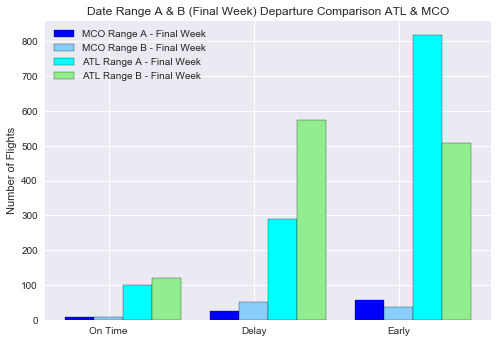

In [395]:
# libraries (values manually inserted)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

palette = sns.color_palette("pastel")

# width of the bars
barWidth = 0.2
 
# Height of the blue bars
#bars1 = [8, 25, 56] MCO range A final
bars1 = ListMCOAF
# Height of the lightskyblue bars
#bars2 = [7, 52, 38] MCO range B final 
bars2 = ListMCOBF
# Height of the cyan bars
#bars3 = [99, 289, 818] ATL range A final
bars3 = ListATLAF
# Height of the lightgreen bars
#bars4 = [120, 574, 509] ATL range B final
bars4 = ListATLBF


# Choose the height of the error bars (bars1)
yer1 = [0, 0.0, 0]
 
# Choose the height of the error bars (bars2)
yer2 = [0, 0.0, 0]

# Choose the height of the error bars (bars1)
yer3 = [0, 0.0, 0]
 
# Choose the height of the error bars (bars2)
yer4 = [0, 0.0, 0]
 
# The x position of bars
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Create blue bars MCO Range A FINAL WEEK 
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=2, label='MCO Range A - Final Week')
 
# Create cyan bars - MCO  Range B FINAL WEEK
plt.bar(r2, bars2, width = barWidth, color = 'lightskyblue', edgecolor = 'black', yerr=yer2, capsize=2, label='MCO Range B - Final Week ')
 
# Create blue bars - ATL  Range A FINAL WEEK
plt.bar(r3, bars3, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer3, capsize=2, label='ATL Range A - Final Week')
 
# Create cyan bars - ATL Range B FINAL WEEK 
plt.bar(r4, bars4, width = barWidth, color = 'lightgreen', edgecolor = 'black', yerr=yer4, capsize=2, label='ATL Range B - Final Week')
 
# general layout
plt.style.use('seaborn')
plt.title("Date Range A & B (Final Week) Departure Comparison ATL & MCO")
plt.xticks([r + barWidth for r in range(len(bars1))], ['On Time','Delay','Early'])
plt.ylabel('Number of Flights')
plt.legend()
 
# Show graphic
plt.savefig("Date_Range_A_B_FINAL_DepartureNumbersofFligts_Comparison_MCO_ATL.png")


plt.show()


The MCO airport even handling less than 8% of the Delta flights comparing with ATL airport, has had a higher percentage of delayed flights. 